In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\DELL\Downloads\now\Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)
df

# Display basic info about the dataset
print("Dataset Overview:\n")
print(df.head(5))  # First 5 rows
print("\nBasic Info:\n")
print(df.info())  # Data types and non-null counts
print("\nSummary Statistics:\n")
print(df.describe())  # Descriptive stats for numeric columns
df

# Step 1.1: Handle Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with missing values
df = df.dropna()
print(f"Dataset shape after dropping missing values: {df.shape}")
df


Dataset Overview:

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1               

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [11]:
# Step 1.2: Handle Outliers
# Identify outliers using the IQR method
numeric_columns = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Dataset shape after outlier removal: {df.shape}")


Dataset shape after outlier removal: (1000, 14)


In [13]:
# Step 1.3: Verify Data Integrity
print("\nUpdated Summary Statistics After Cleaning:\n")
print(df.describe())


Updated Summary Statistics After Cleaning:

          patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123  

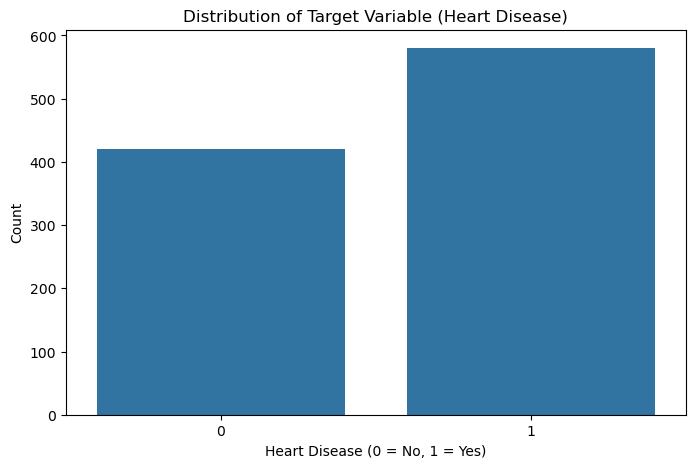

In [17]:
# Step 2.1: Visualize Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x="target", data=df)
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.savefig("target_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


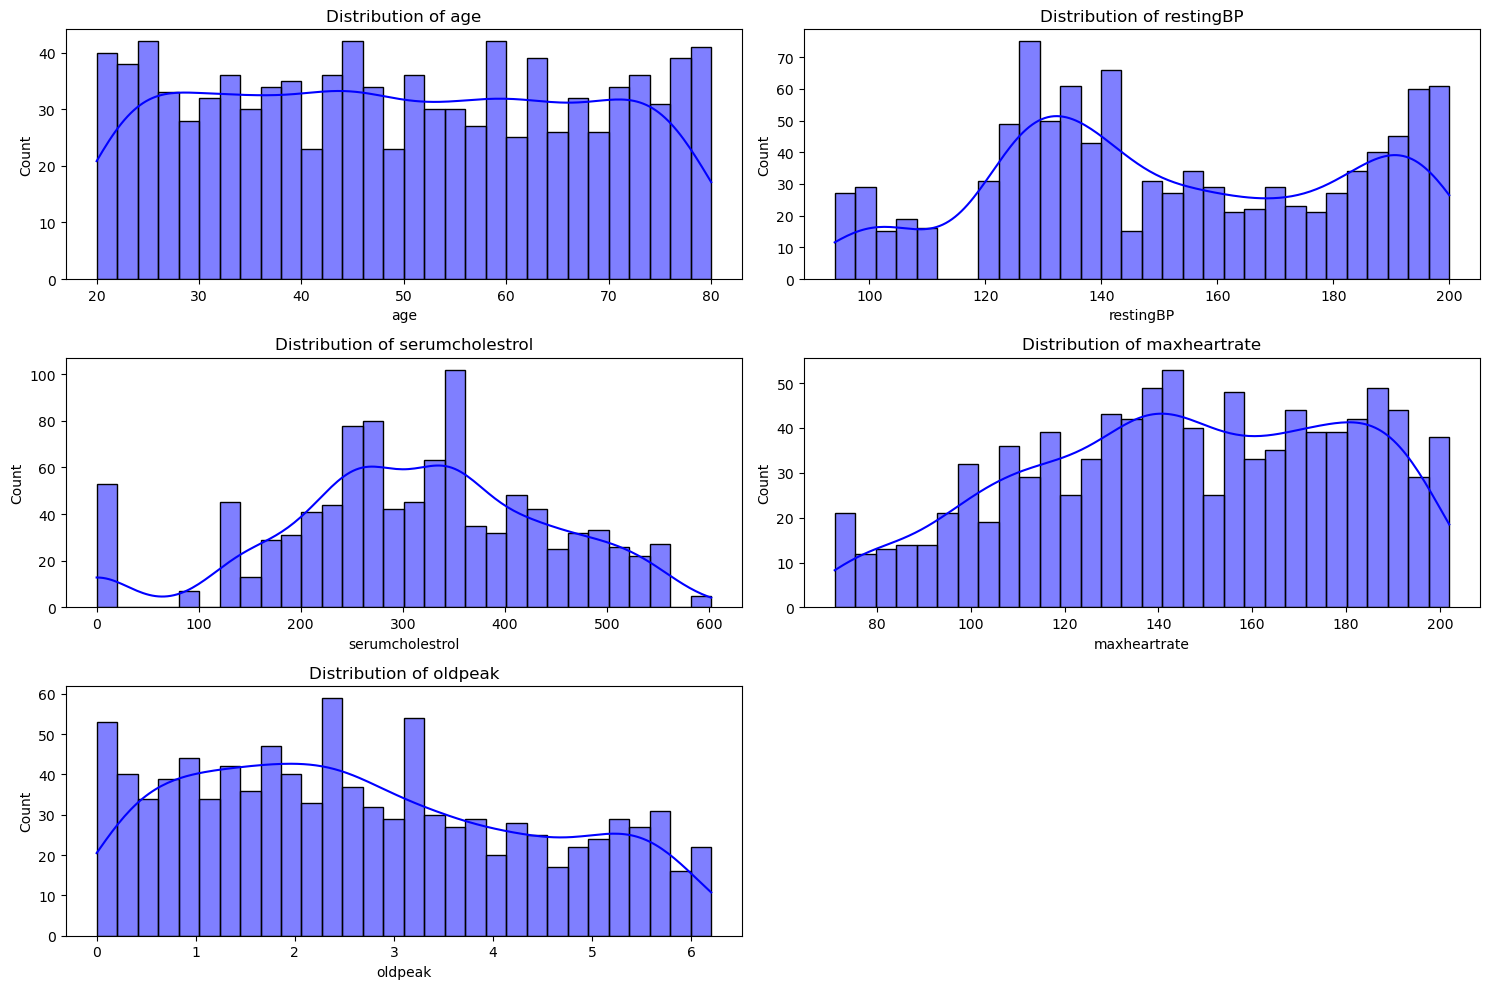

In [20]:
# Step 2.2: Distribution of Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("numerical_distributions.png", dpi=300, bbox_inches="tight")
plt.show()


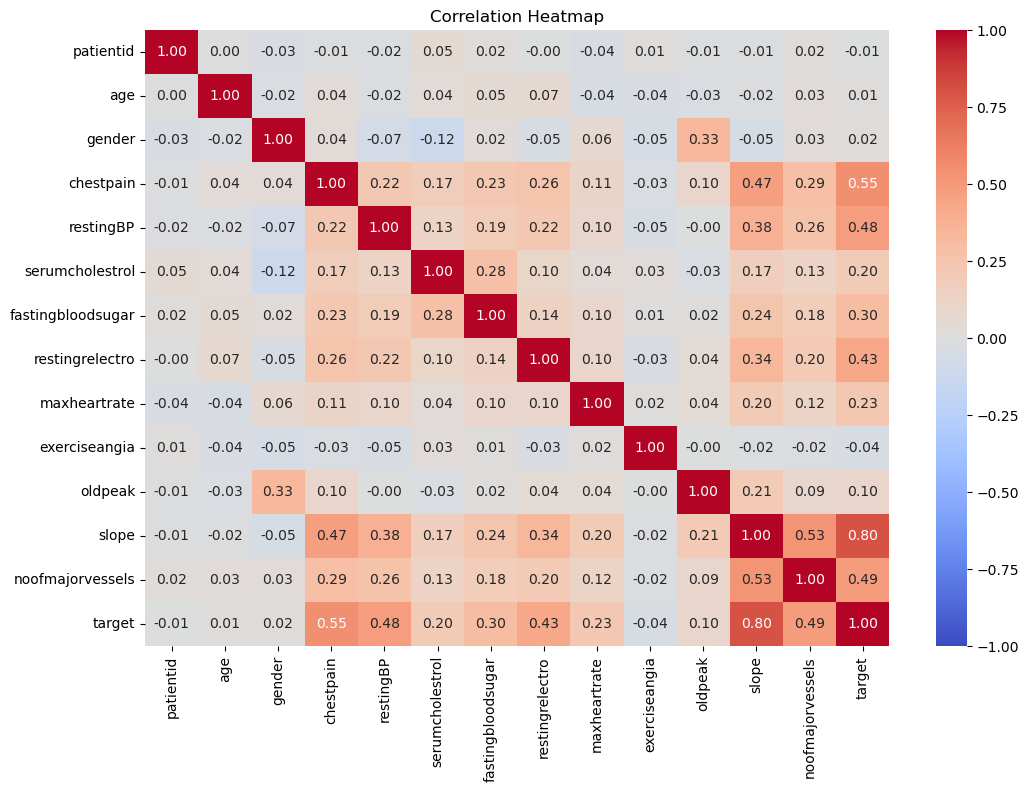

In [21]:
# Step 2.3: Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


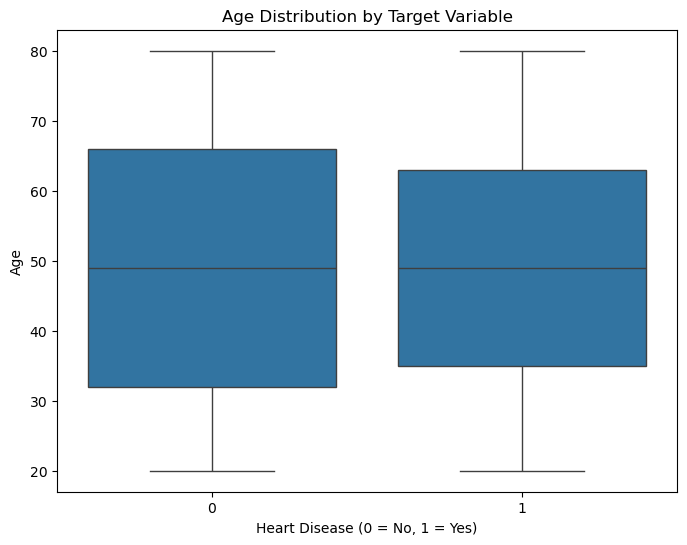

In [30]:
# Step 2.4: Feature-Target Relationships
plt.figure(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.title("Age Distribution by Target Variable")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.savefig("age_target_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

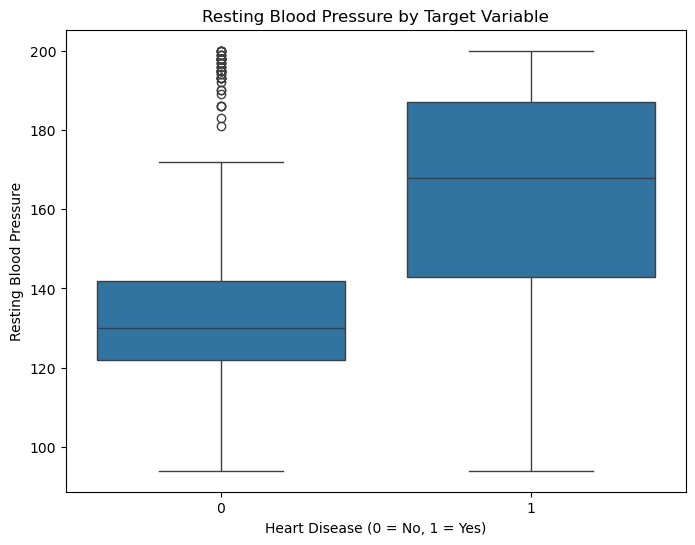

In [28]:
# Analyze other features (e.g., restingBP, serumcholestrol) similarly
plt.figure(figsize=(8, 6))
sns.boxplot(x="target", y="restingBP", data=df)
plt.title("Resting Blood Pressure by Target Variable")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting Blood Pressure")
plt.savefig("restingBP_target_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()


In [32]:
# Step 3: Feature Engineering

# 3.1 Handle Categorical Variables
# Assuming 'chestpain' and 'gender' are categorical columns
categorical_columns = ["chestpain", "gender"]

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\nColumns after one-hot encoding:\n", df_encoded.columns)

# 3.2 Scale Numerical Variables
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numerical_columns = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("\nFirst 5 rows after scaling:\n", df_encoded.head())

# 3.3 Prepare Features and Target
X = df_encoded.drop("target", axis=1)  # Features
y = df_encoded["target"]  # Target

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")



Columns after one-hot encoding:
 Index(['patientid', 'age', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
       'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope',
       'noofmajorvessels', 'target', 'chestpain_1', 'chestpain_2',
       'chestpain_3', 'gender_1'],
      dtype='object')

First 5 rows after scaling:
    patientid       age  restingBP  serumcholestrol  fastingbloodsugar  \
0     103368  0.210464   0.642833        -2.352717                  0   
1     119250 -0.517591  -1.928098        -0.622817                  0   
2     119372 -0.013553  -0.625938        -1.280028                  0   
3     132514 -0.349578  -0.458995        -0.124243                  1   
4     146211 -1.021629   1.577717        -2.352717                  0   

   restingrelectro  maxheartrate  exerciseangia   oldpeak  slope  \
0                1      0.044567              0  1.507245      3   
1                1     -0.891840              0  0.576955      1   
2         

Training set shape: (800, 15), (800,)
Testing set shape: (200, 15), (200,)
Model Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        84
           1       0.93      0.97      0.95       116

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



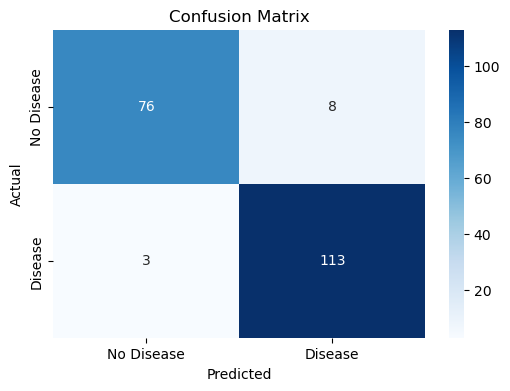

['logistic_regression_model.pkl']

In [40]:
# Step 4: Model Building and Evaluation

# 4.1 Split Data into Train-Test Sets
from sklearn.model_selection import train_test_split

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# 4.2 Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

# 4.3 Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 4.4 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# 4.5 Save the Model (Optional, for deployment)
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")


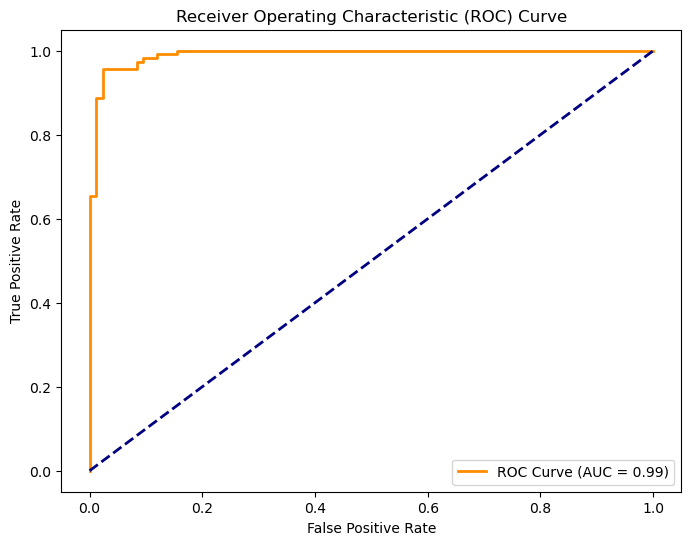

Area Under the Curve (AUC): 0.99

Key Dataset Insights:
- Mean Age of Patients: 49.24 years
- Percentage of Males: 76.5%
- Percentage of Patients with Heart Disease: 58.0%
- Top Correlated Features with Heart Disease:
slope               0.797358
chestpain           0.554228
noofmajorvessels    0.489866
Name: target, dtype: float64


In [44]:
# Step 5.1: ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for positive class
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

# Display AUC Score
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")

# Step 5.2: Additional Insights from the Dataset
print("\nKey Dataset Insights:")
print(f"- Mean Age of Patients: {df['age'].mean():.2f} years")
print(f"- Percentage of Males: {df['gender'].mean() * 100:.1f}%")
print(f"- Percentage of Patients with Heart Disease: {df['target'].mean() * 100:.1f}%")
print(f"- Top Correlated Features with Heart Disease:\n{correlation_matrix['target'].sort_values(ascending=False)[1:4]}")


In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, classification_report

# Predict probabilities for AUC calculation
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Predict target for accuracy, precision, and recall
y_pred = log_reg.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
auc = roc_auc_score(y_test, y_pred_prob) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

# Display Results
print(f"Algorithm Used: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}%")
print(f"AUC: {auc:.2f}%")
print(f"Evaluation Metrics:")
print(f" - Precision: {precision:.2f}%")
print(f" - Recall: {recall:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Algorithm Used: Logistic Regression
Accuracy: 94.50%
AUC: 99.10%
Evaluation Metrics:
 - Precision: 93.39%
 - Recall: 97.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        84
           1       0.93      0.97      0.95       116

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

